## Project Code

#### Imports

In [1]:
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### PCA Variance 

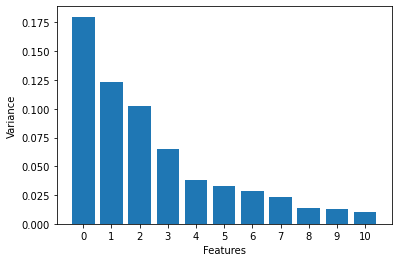

In [9]:
df = pd.read_csv("genedata.csv")
dfd = df[df.columns[2:]]
sel = VarianceThreshold(threshold=(1.9)).fit_transform(dfd)
std = StandardScaler().fit_transform(sel)

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)

plt.xlabel("Features")
plt.ylabel("Variance")

plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

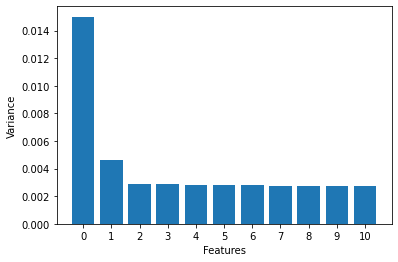

In [11]:
df = pd.read_csv("msdata.csv")
dfd = df[df.columns[2:]]
sel = VarianceThreshold(threshold=(1.9)).fit_transform(dfd)
std = StandardScaler().fit_transform(sel)

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)

plt.xlabel("Features")
plt.ylabel("Variance")

plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

### Helper functions for analysing data

In [23]:
# For checking how many features are left after using the threshold
dfd.var()[dfd.var() > 9].count()

# For-loops for checking which values provide the highest NMI

#### Jan paste in din kod hit :DD ####

914

#### Analysing the data

In [22]:
df = pd.read_csv("msdata.csv")
dfd = df[df.columns[2:]]
sel = VarianceThreshold(threshold=(4)).fit_transform(dfd)
std = StandardScaler().fit_transform(sel)

pca = PCA()
principalComponents = pca.fit_transform(std)

PCA_components = pd.DataFrame(principalComponents)

kmeans = KMeans(n_clusters=3).fit(PCA_components.iloc[:,:2])
label = kmeans.labels_
#np.savetxt(r'/path-to-dir/ms_labels.txt', label, fmt='%d')
kmeanNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Msdata KMeans Normalized Mutual Information Score: {}".format(kmeanNorm))

brch = Birch(n_clusters=3).fit(PCA_components.iloc[:,:3])
label = brch.labels_
brchNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Msdata Birch Normalized Mutual Information Score: {}".format(brchNorm))

agglo = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(PCA_components.iloc[:,:12])
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Msdata Agglomerative clustering Normalized Mutual Information Score: {}".format(aggloNorm))

agglo = AgglomerativeClustering(n_clusters=3, linkage="average").fit(PCA_components.iloc[:,:12])
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Msdata Agglomerative clustering Normalized Mutual Information Score: {}".format(aggloNorm))

agglo = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(PCA_components.iloc[:,:12])
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Msdata Agglomerative clustering Normalized Mutual Information Score: {}".format(aggloNorm))

agglo = AgglomerativeClustering(n_clusters=3, linkage="single").fit(PCA_components.iloc[:,:12])
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Msdata Agglomerative clustering Normalized Mutual Information Score: {}".format(aggloNorm))


Msdata KMeans Normalized Mutual Information Score: 0.7057431100067889
Msdata Birch Normalized Mutual Information Score: 0.6804449598029535
Msdata Agglomerative clustering Normalized Mutual Information Score: 0.5147703009647473
Msdata Agglomerative clustering Normalized Mutual Information Score: 0.0037554952501355943
Msdata Agglomerative clustering Normalized Mutual Information Score: 0.18152774672960686
Msdata Agglomerative clustering Normalized Mutual Information Score: 0.0037554952501355943


In [19]:
df = pd.read_csv("genedata.csv")
dfd = df[df.columns[2:]]
sel = VarianceThreshold(threshold=(1.9)).fit_transform(dfd)
std = StandardScaler().fit_transform(sel)

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(std)

PCA_components = pd.DataFrame(principalComponents)

kmeans = KMeans(n_clusters=5).fit(PCA_components.iloc[:,:12])
label = kmeans.labels_
kmeanNormalized = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Gene data KMeans Normalized Mutual Information Score: {}".format(kmeanNormalized))

brch = Birch(n_clusters=5).fit(PCA_components.iloc[:,:12])
label = brch.labels_
#np.savetxt(r'/path-to-dir/gene_labels.txt', label, fmt='%d')
brchNormalized = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Gene data Birch Normalized Mutual Information Score: {}".format(brchNormalized))

agglo = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(PCA_components.iloc[:,:12])
label = agglo.labels_
aggloNormalized = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("Gene data Agglomerative Clustering Normalized Mutual Information Score: {}".format(aggloNormalized))



Gene data KMeans Normalized Mutual Information Score: 0.8744396463524872
Gene data Birch Normalized Mutual Information Score: 0.972646282083752
Gene data Agglomerative Clustering Normalized Mutual Information Score: 0.972646282083752
